## Problem - Description

PowerCo is a major gas and electricity utility that supplies to corporate, SME (Small & Medium Enterprise), and residential customers. The power-liberalization of the energy market in Europe has led to significant customer churn, especially in the SME segment. They have partnered with BCG to help diagnose the source of churning SME customers.

A fair hypothesis is that price changes affect customer churn. Therefore, it is helpful to know which customers are more (or less) likely to churn at their current price, for which a good predictive model could be useful.

Moreover, for those customers that are at risk of churning, a discount might incentivize them to stay with our client. The head of the SME division is considering a 20% discount that is considered large enough to dissuade almost anyone from churning (especially those for whom price is the primary concern).

The Associate Director (AD) held an initial team meeting to discuss various hypotheses, including churn due to price sensitivity. After discussion with your team, you have been asked to go deeper on the hypothesis that the churn is driven by the customers’ price sensitivities. 

Your AD wants an email with your thoughts on how the team should go about testing this hypothesis.

The client plans to use the predictive model on the 1st working day of every month to indicate to which customers the 20% discount should be offered.

Sub-Task 1:

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

# EDA`

client_data.csv

●	id = client company identifier
●	activity_new = category of the company’s activity
●	channel_sales = code of the sales channel
●	cons_12m = electricity consumption of the past 12 months
●	cons_gas_12m = gas consumption of the past 12 months
●	cons_last_month = electricity consumption of the last month
●	date_activ = date of activation of the contract
●	date_end = registered date of the end of the contract
●	date_modif_prod = date of the last modification of the product
●	date_renewal = date of the next contract renewal
●	forecast_cons_12m = forecasted electricity consumption for next 12 months
●	forecast_cons_year = forecasted electricity consumption for the next calendar year
●	forecast_discount_energy = forecasted value of current discount
●	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
●	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
●	has_gas = indicated if client is also a gas client
●	imp_cons = current paid consumption
●	margin_gross_pow_ele = gross margin on power subscription
●	margin_net_pow_ele = net margin on power subscription
●	nb_prod_act = number of active products and services
●	net_margin = total net margin
●	num_years_antig = antiquity of the client (in number of years)
●	origin_up = code of the electricity campaign the customer first subscribed to
●	pow_max = subscribed power
●	churn = has the client churned over the next 3 months

price_data.csv

●	id = client company identifier
●	price_date = reference date
●	price_off_peak_var = price of energy for the 1st period (off peak)
●	price_peak_var = price of energy for the 2nd period (peak)
●	price_mid_peak_var = price of energy for the 3rd period (mid peak)
●	price_off_peak_fix = price of power for the 1st period (off peak)
●	price_peak_fix = price of power for the 2nd period (peak)
●	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


In [164]:
#importing required libaries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',60)

In [3]:
df_price = pd.read_csv('price_data.csv')
df_client = pd.read_csv('client_data.csv')

In [8]:
df_price

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [11]:
df_client

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [12]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
# we have both numerical and object type columns
# Date objects are in categorical format

In [19]:
for i in ['date_activ','date_end','date_modif_prod','date_renewal']:
    df_client[i] = pd.to_datetime(df_client[i])


In [20]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [13]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [21]:
df_price['price_date'] = pd.to_datetime(df_price['price_date'])


In [14]:
df_client.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [16]:
df_client.describe(exclude='number').T

,count,unique,top,freq
id,14606,14606,24011ae4ebbe3035111d65fa7c15bc57,1
channel_sales,14606,8,foosdfpfkusacimwkcsosbicdxkicaua,6754
date_activ,14606,1796,2009-08-01,95
date_end,14606,368,2016-02-01,145
date_modif_prod,14606,2129,2015-11-01,721
date_renewal,14606,386,2015-06-23,587
has_gas,14606,2,f,11955
origin_up,14606,6,lxidpiddsbxsbosboudacockeimpuepw,7097


In [17]:
df_client.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [26]:
df_price.isna().sum()
print('There are no missing values in both data sets')

There are no missing values in both data sets


In [25]:
print(f'no of duplicated values in client data : {len(df_client[df_client.duplicated()])}')
print(f'no of duplicated values in price data : {len(df_client[df_client.duplicated()])}')

no of duplicated values in client data : 0
no of duplicated values in price data : 0


In [ ]:
# in both the data frames there are no null values present

In [ ]:
# Data Visulaization


**we will first check the percentage of churn in the dataset we observe whether our dataset is balanced or not**

In [29]:
df_client['churn'].value_counts(normalize=True)

0    0.902848
1    0.097152
Name: churn, dtype: float64

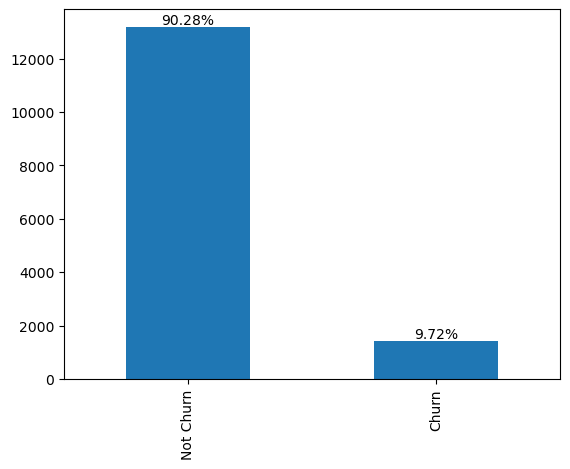

In [40]:
churn_counts = df_client['churn'].value_counts()
ax = churn_counts.plot(kind='bar')

total = churn_counts.sum()
percentages = [f'{count / total * 100:.2f}%' for count in churn_counts]

for i, p in enumerate(ax.patches):
    ax.annotate(percentages[i], (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set x-tick labels
ax.set_xticklabels(['Not Churn', 'Churn'])

plt.show()

In [42]:
df_client['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [45]:
df_client.groupby(['channel_sales','churn'])['churn'].count()

channel_sales                     churn
MISSING                           0        3442
                                  1         283
epumfxlbckeskwekxbiuasklxalciiuu  0           3
ewpakwlliwisiwduibdlfmalxowmwpci  0         818
                                  1          75
fixdbufsefwooaasfcxdxadsiekoceaa  0           2
foosdfpfkusacimwkcsosbicdxkicaua  0        5934
                                  1         820
lmkebamcaaclubfxadlmueccxoimlema  0        1740
                                  1         103
sddiedcslfslkckwlfkdpoeeailfpeds  0          11
usilxuppasemubllopkaafesmlibmsdf  0        1237
                                  1         138
Name: churn, dtype: int64

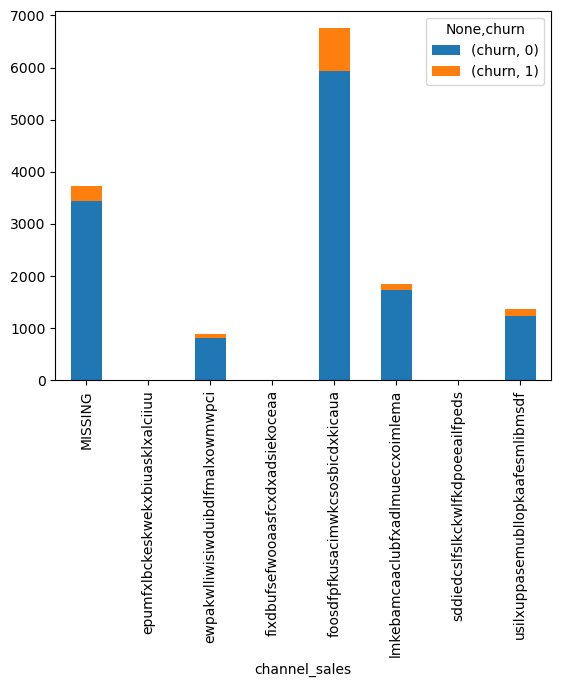

In [62]:
ax = df_client.groupby(['channel_sales', 'churn'])[['churn']].count().unstack().plot(kind='bar', stacked=True)



Consumption

Now, we will see the consumption of customers during the last month and 12 months againt the churn. Because this is a numeric - categorical comparison therefore we can use histogram distribution or box plot visualization.

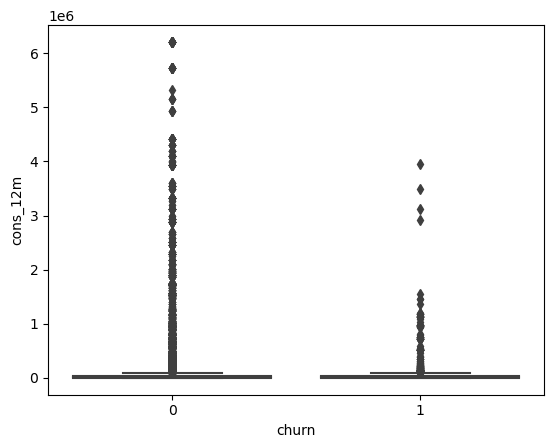

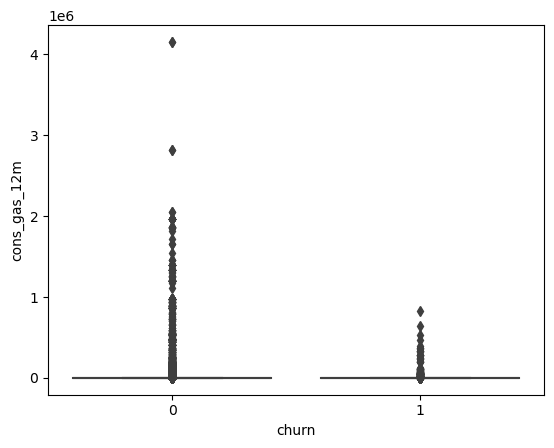

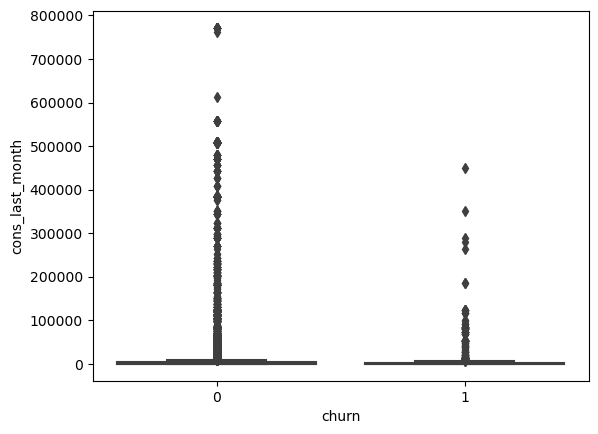

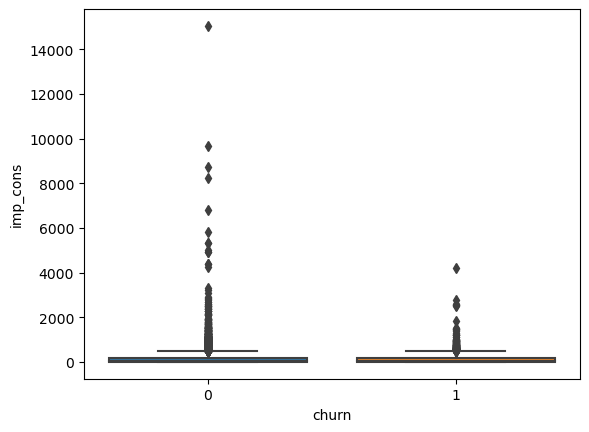

In [65]:
consumption = df_client[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]
for i in consumption.columns:
    sns.boxplot(x = df_client['churn'],y=consumption[i])
    plt.show()

In [66]:
df_client

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [77]:
consumption = df_client[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]


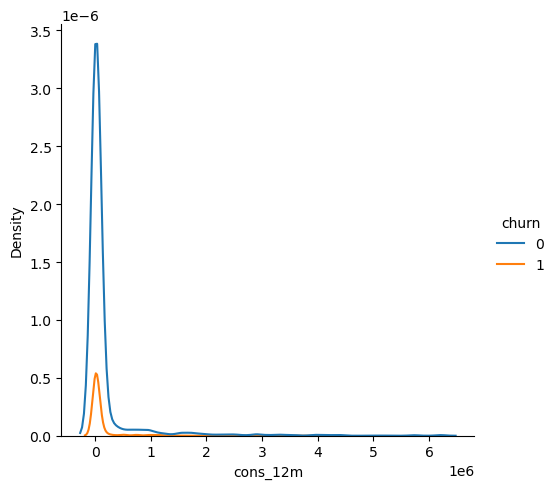

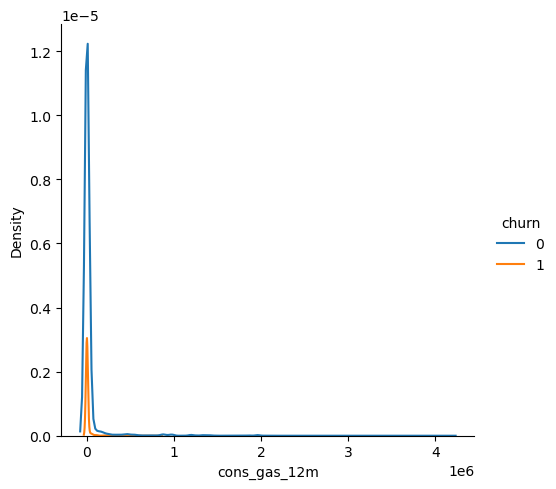

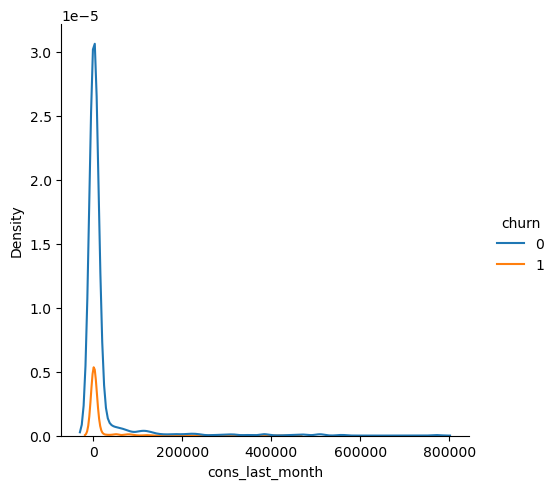

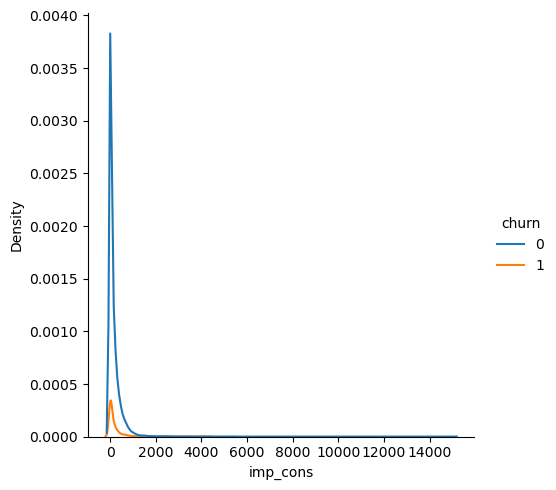

In [78]:
for i in consumption.columns:
    sns.displot(data=  df_client,x = i,hue = 'churn',kind='kde')
    plt.show()

In [79]:
# all +vely skewed will need to treat the ouliers if required

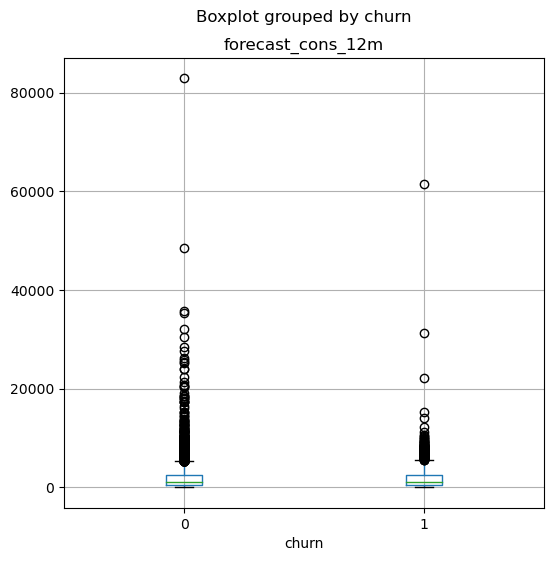

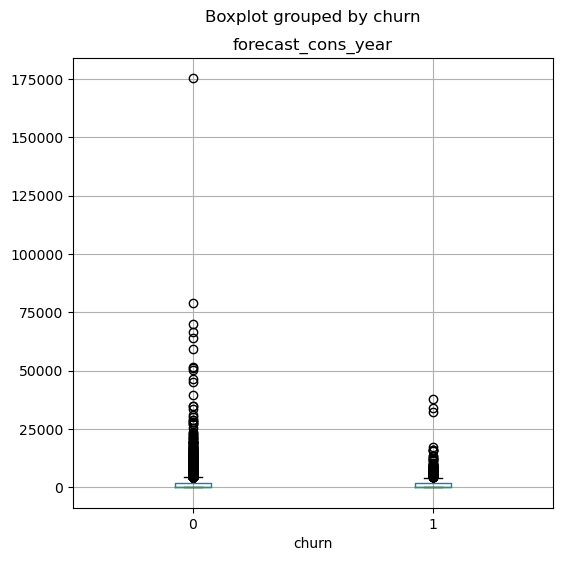

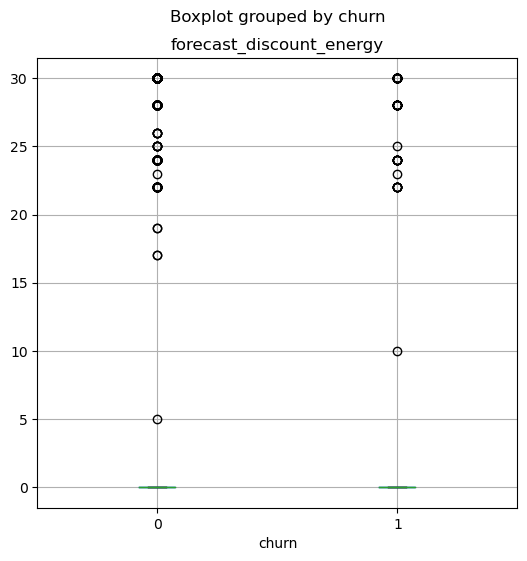

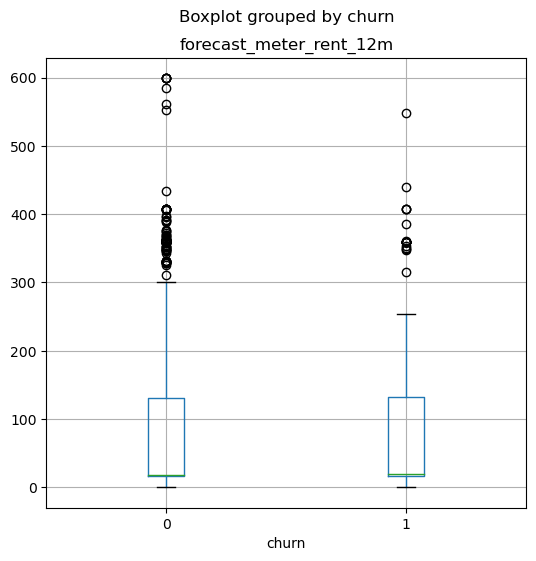

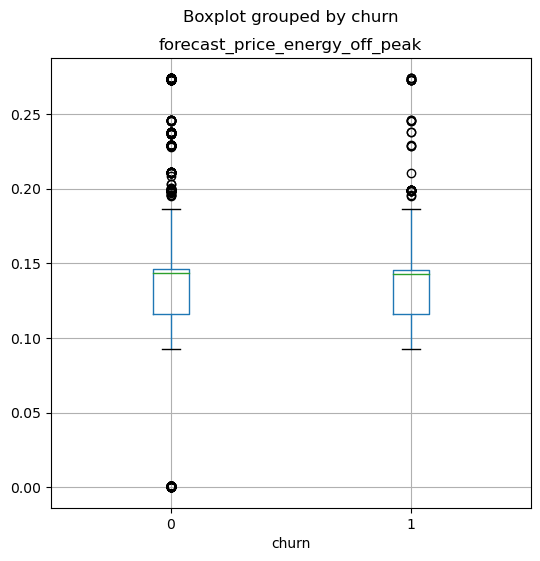

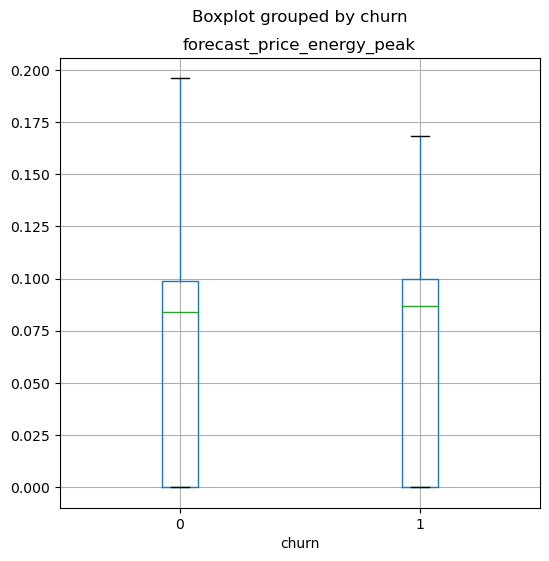

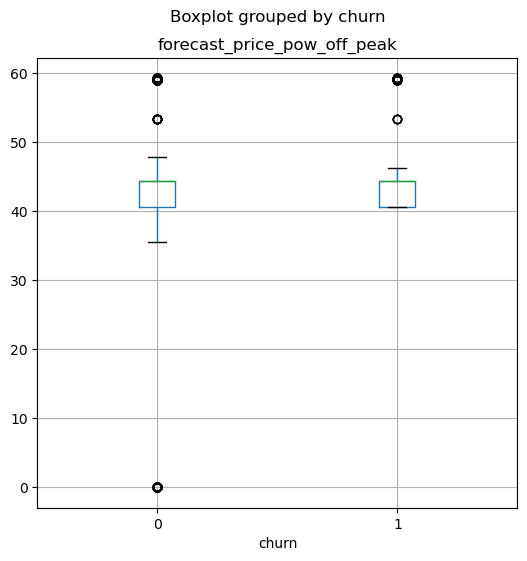

In [81]:
## Forecast

forecast = df_client[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]
for col in forecast:
    df_client.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

In [83]:
##Contract type

contract_type = df_client[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [87]:
contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count()

churn  has_gas
0      f          10753
       t           2434
1      f           1202
       t            217
Name: id, dtype: int64

<AxesSubplot:xlabel='churn,has_gas'>

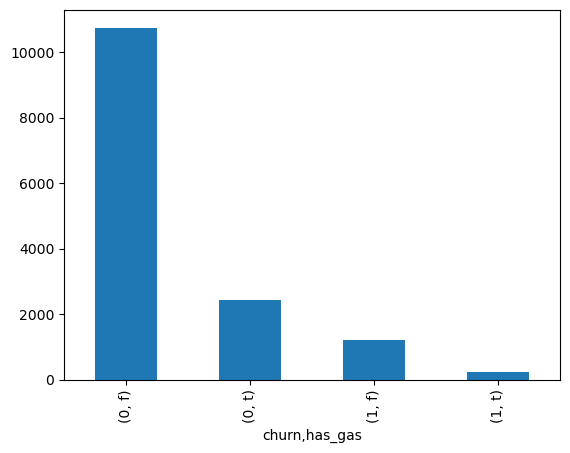

In [88]:
contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().plot(kind='bar')

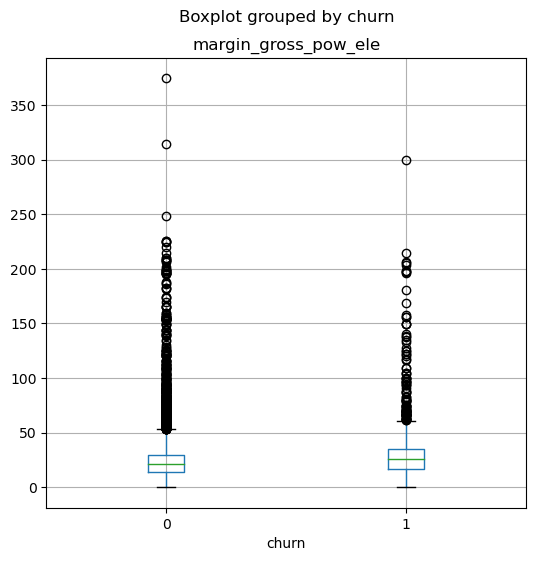

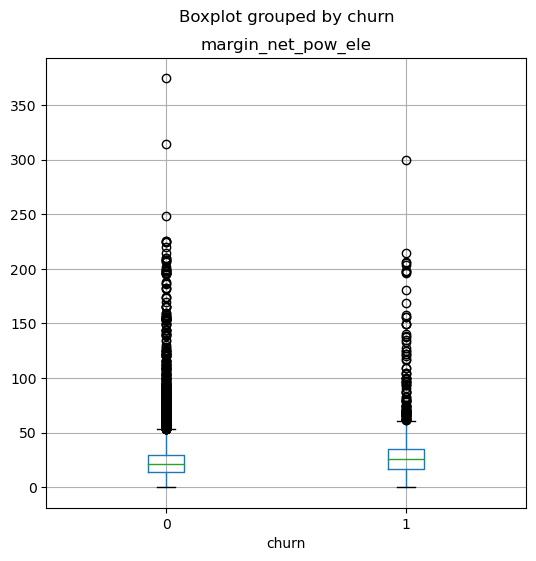

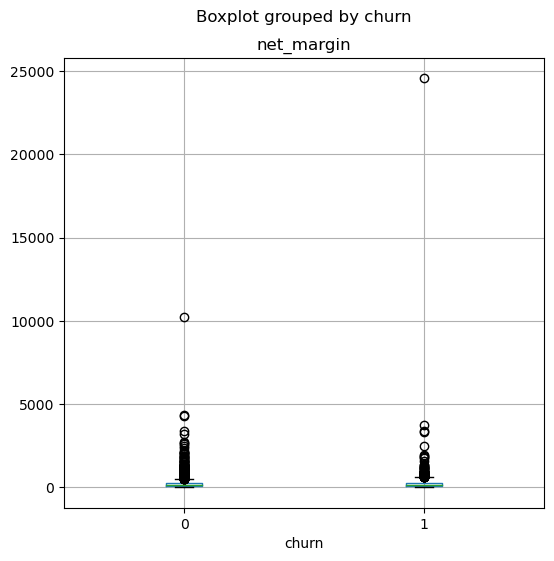

In [90]:
#Margins

margin = df_client[["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]
for col in margin:
    df_client.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

<AxesSubplot:xlabel='churn', ylabel='pow_max'>

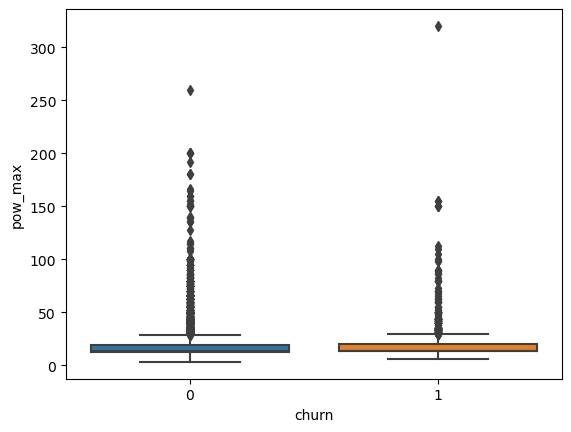

In [100]:
#Subscribed power#

power = df_client[ "pow_max"]
sns.boxplot(y = df_client['pow_max'],x= df_client['churn'])

In [101]:
df_client.groupby('churn')['pow_max'].mean()
#not much difference in subscribed power between two

churn
0    18.000339
1    19.387827
Name: pow_max, dtype: float64

In [102]:
df_client.groupby('churn')['pow_max'].median()

churn
0    13.856
1    13.856
Name: pow_max, dtype: float64

In [ ]:
# we will now foccus more on the price_columns

In [105]:
df_price['id'].value_counts()

038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: id, Length: 16096, dtype: int64

In [107]:
df_price['id'].value_counts().value_counts()
#most of the customers have the 12 month price periods

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

In [109]:
df_price['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

Most customers have a 12-month price records each. Luckily, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.

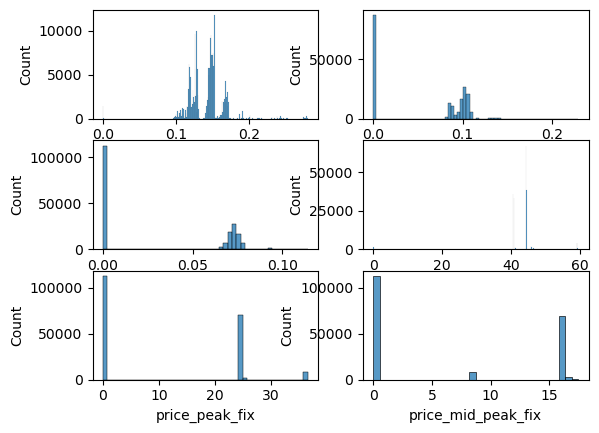

In [111]:
j=1
for i in df_price.select_dtypes(include='number').columns:
    plt.subplot(3,2,j)
    sns.histplot(df_price[i])
    j+=1

In [112]:
df_price.skew()

price_off_peak_var   -0.311879
price_peak_var       -0.133292
price_mid_peak_var    0.365508
price_off_peak_fix   -2.889775
price_peak_fix        0.471709
price_mid_peak_fix    0.433076
dtype: float64

In [113]:
#througout the time period we can see that we have constant values

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


Sub-Task 2:

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.

In [117]:
df_price['price_date'].min()

Timestamp('2015-01-01 00:00:00')

In [118]:
df_price['price_date'].max()

Timestamp('2015-12-01 00:00:00')

In [126]:
price_df = df_price.copy()

In [128]:
client_df = df_client.copy()

In [130]:
mean_year = df_price.groupby('id').mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [131]:
#rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [132]:
mean_year

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [133]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [134]:
mean_year

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [135]:
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_med_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

In [136]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_med_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

In [137]:
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [138]:
price_features

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_med_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.114428,0.096080,0.069418,40.728885,24.437330,16.291555,40.843313,24.533410,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752,0.113848,0.095499,0.068838,40.728885,24.437330,16.291555,40.842733,24.532829,16.360393,0.112488,0.094804,0.068829,40.728885,24.43733,16.291555,40.841373,24.532134,16.360384
16091,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,44.501269,0.000000,0.000000,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,44.589757,0.000000,0.000000
16092,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,41.381645,25.064896,16.882958,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555,41.380284,25.064201,16.882949
16093,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,40.767579,24.490024,16.332952,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071


In [139]:
price_features.shape

(16095, 28)

In [140]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_med_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,0.123007,0.104108,0.075469,40.728885,24.43733,16.291555,40.851892,24.541438,16.367024,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


<AxesSubplot:>

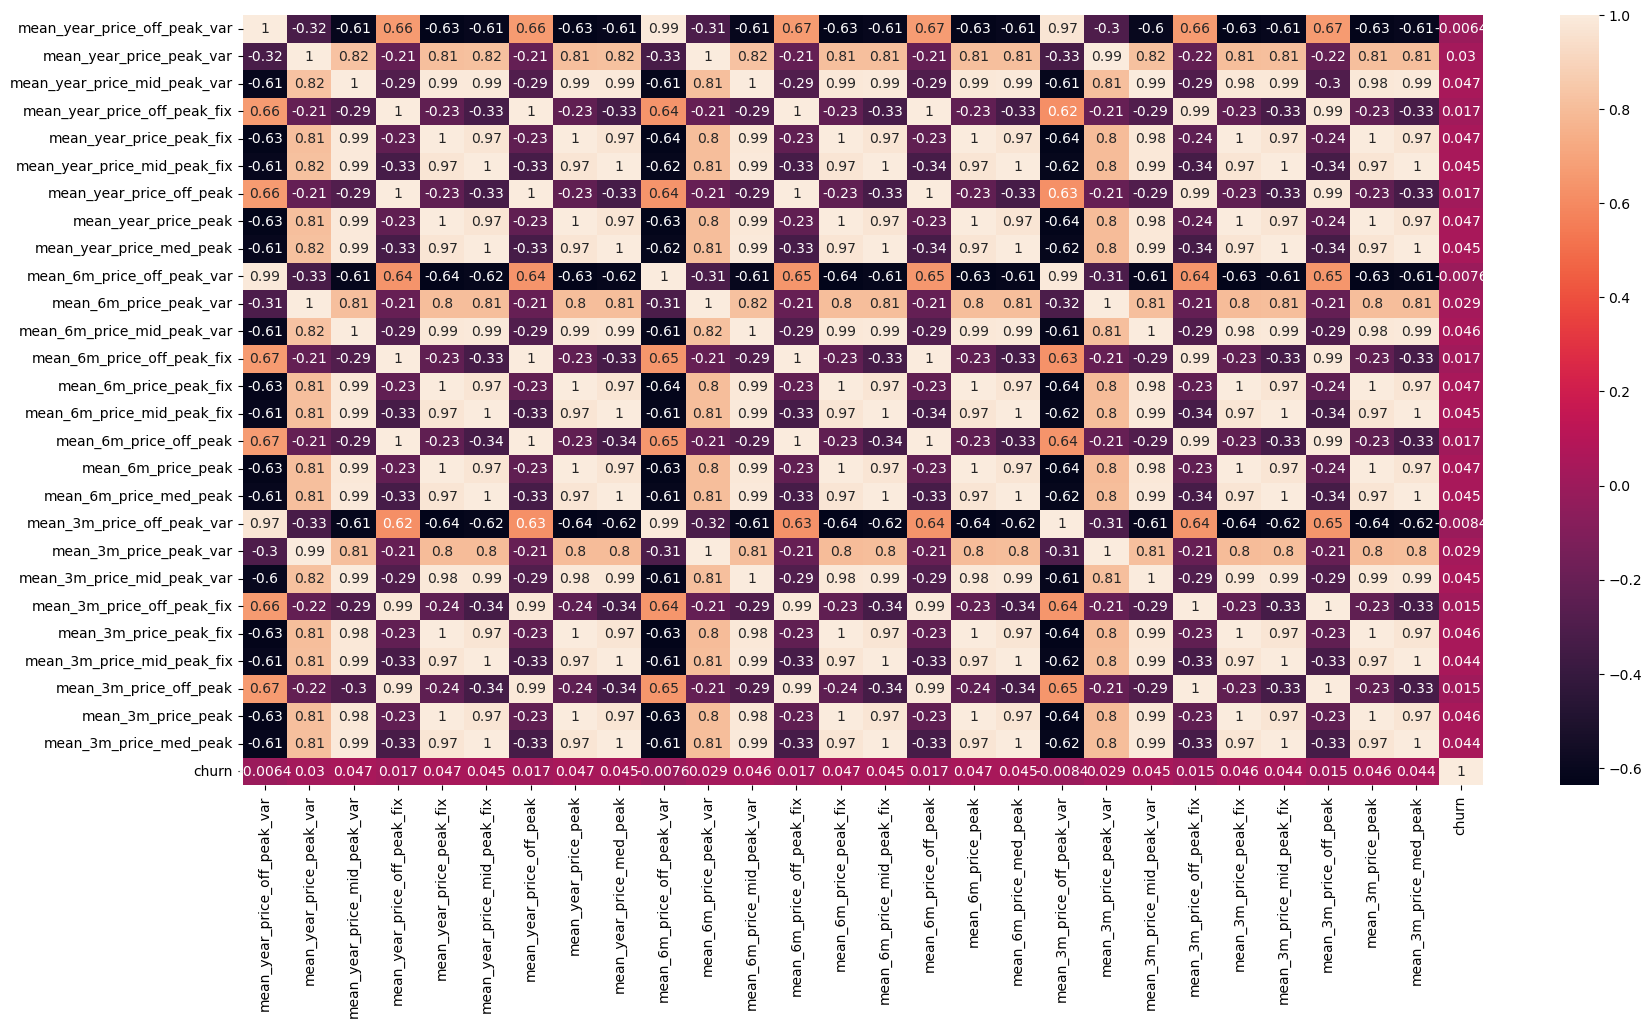

In [142]:
plt.figure(figsize=(20,10))
sns.heatmap(price_churn.corr(),annot=True)

In [147]:
price_churn

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,mean_6m_price_off_peak_var,mean_6m_price_peak_var,mean_6m_price_mid_peak_var,mean_6m_price_off_peak_fix,mean_6m_price_peak_fix,mean_6m_price_mid_peak_fix,mean_6m_price_off_peak,mean_6m_price_peak,mean_6m_price_med_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.000000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.000000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,0.123007,0.104108,0.075469,40.728885,24.437330,16.291555,40.851892,24.541438,16.367024,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,ffebf6a979dd0b17a41076df1057e733,0.122426,0.102375,0.072210,40.606699,24.364017,16.242678,40.729125,24.466392,16.314889,0.118442,0.100477,0.072089,40.647429,24.388454,16.258969,40.765871,24.488931,16.331058,0.115916,0.099461,0.071884,40.728885,24.43733,16.291555,40.844801,24.536791,16.363439,0
14601,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000,0.145449,0.000000,0.000000,44.355820,0.000000,0.000000,44.501269,0.000000,0.000000,0.145047,0.000000,0.000000,44.444710,0.00000,0.000000,44.589757,0.000000,0.000000,0
14602,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,0.152759,0.127566,0.091403,41.228885,24.937330,16.791555,41.381645,25.064896,16.882958,0.151399,0.126871,0.091394,41.228885,24.93733,16.791555,41.380284,25.064201,16.882949,0
14603,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414,0.120150,0.101570,0.073983,40.647429,24.388454,16.258969,40.767579,24.490024,16.332952,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071,0


##### we can statistically test since we have two classes and diff price values we can two sample test to check whether prices of  churned customers are higher  than non churn


In [145]:
from scipy.stats import * 

In [149]:
for i in price_churn.select_dtypes(include='number').columns:
    st,p = shapiro(price_churn[i])
    if p < 0.05:
        print(f'the feature {i} is not normal')
    else:
        print(f'the feature {i} is normal')

the feature mean_year_price_off_peak_var is not normal
the feature mean_year_price_peak_var is not normal
the feature mean_year_price_mid_peak_var is not normal
the feature mean_year_price_off_peak_fix is not normal
the feature mean_year_price_peak_fix is not normal
the feature mean_year_price_mid_peak_fix is not normal
the feature mean_year_price_off_peak is not normal
the feature mean_year_price_peak is not normal
the feature mean_year_price_med_peak is not normal
the feature mean_6m_price_off_peak_var is not normal
the feature mean_6m_price_peak_var is not normal
the feature mean_6m_price_mid_peak_var is not normal
the feature mean_6m_price_off_peak_fix is not normal
the feature mean_6m_price_peak_fix is not normal
the feature mean_6m_price_mid_peak_fix is not normal
the feature mean_6m_price_off_peak is not normal
the feature mean_6m_price_peak is not normal
the feature mean_6m_price_med_peak is not normal
the feature mean_3m_price_off_peak_var is not normal
the feature mean_3m_pri

In [ ]:
# we will go by non_parametric test

#null hypo : churn_price <= not_churn
#alter hypo: churn_price > not_churn

In [152]:
greater = []
lesser = []
for i in price_churn.select_dtypes(include='number').drop(columns='churn').columns:
    ch = price_churn[price_churn['churn'] == 1][i]
    nch = price_churn[price_churn['churn'] ==0][i]
    stat,p_val = mannwhitneyu(ch,nch,alternative='greater')
    if p_val < 0.05:
        greater.append(i)
    else:
        lesser.append(i)


In [153]:
greater


['mean_year_price_peak_var',
 'mean_year_price_mid_peak_var',
 'mean_year_price_peak_fix',
 'mean_year_price_mid_peak_fix',
 'mean_year_price_peak',
 'mean_year_price_med_peak',
 'mean_6m_price_peak_var',
 'mean_6m_price_mid_peak_var',
 'mean_6m_price_peak_fix',
 'mean_6m_price_mid_peak_fix',
 'mean_6m_price_peak',
 'mean_6m_price_med_peak',
 'mean_3m_price_peak_var',
 'mean_3m_price_mid_peak_var',
 'mean_3m_price_peak_fix',
 'mean_3m_price_mid_peak_fix',
 'mean_3m_price_peak',
 'mean_3m_price_med_peak']

<Figure size 2000x1000 with 0 Axes>

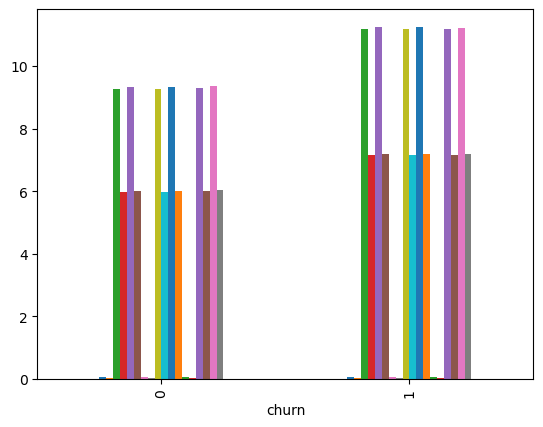

In [179]:
plt.figure(figsize=(20,10))
ax = price_churn.groupby('churn')[greater].mean().plot(kind='bar')
plt.legend(['Value'], loc='upper right')

# Remove the legend
ax.legend_.remove()
plt.show()
# here its evident that means are higher for churned customers

In [154]:
lesser


['mean_year_price_off_peak_var',
 'mean_year_price_off_peak_fix',
 'mean_year_price_off_peak',
 'mean_6m_price_off_peak_var',
 'mean_6m_price_off_peak_fix',
 'mean_6m_price_off_peak',
 'mean_3m_price_off_peak_var',
 'mean_3m_price_off_peak_fix',
 'mean_3m_price_off_peak']

In [170]:
price_churn.groupby('churn')['mean_6m_price_off_peak'].mean()

churn
0    43.098176
1    43.360423
Name: mean_6m_price_off_peak, dtype: float64

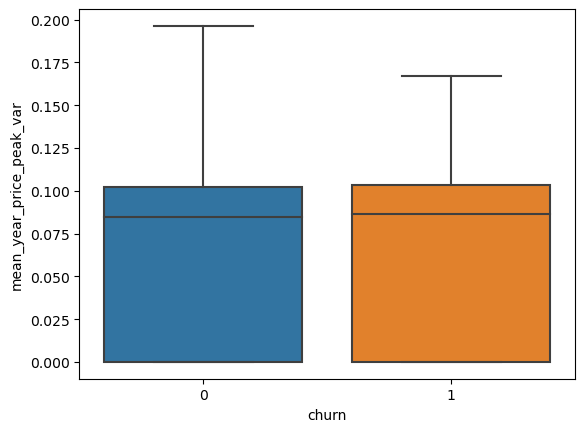

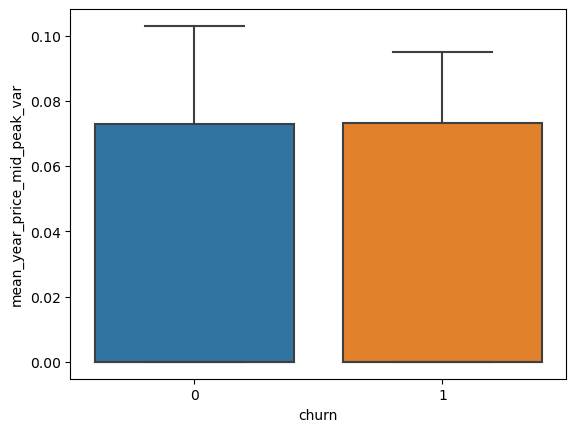

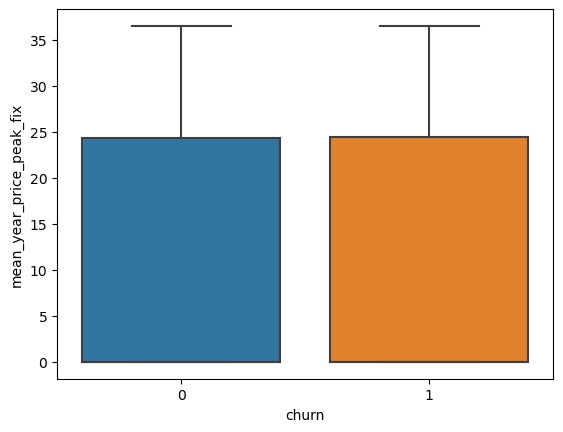

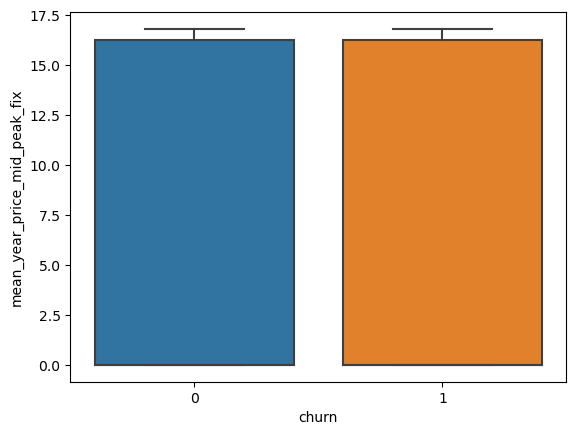

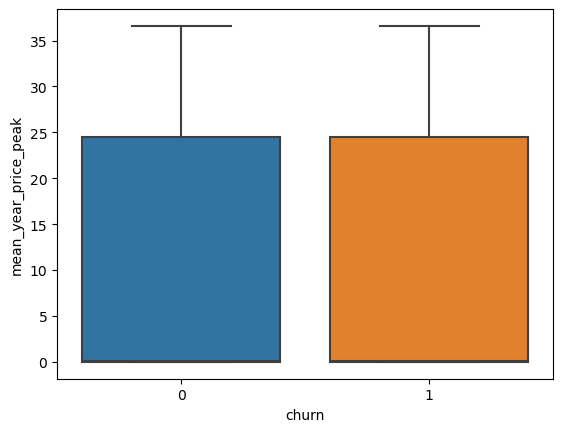

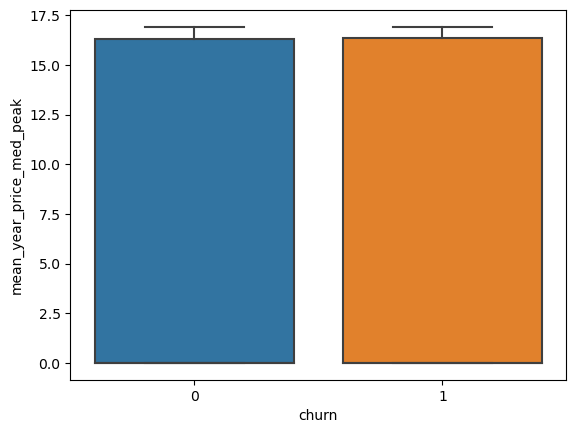

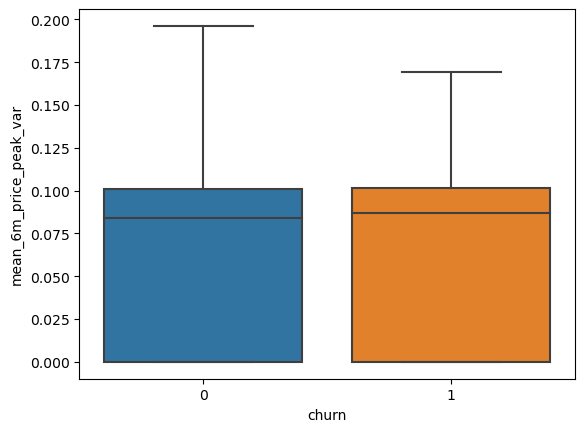

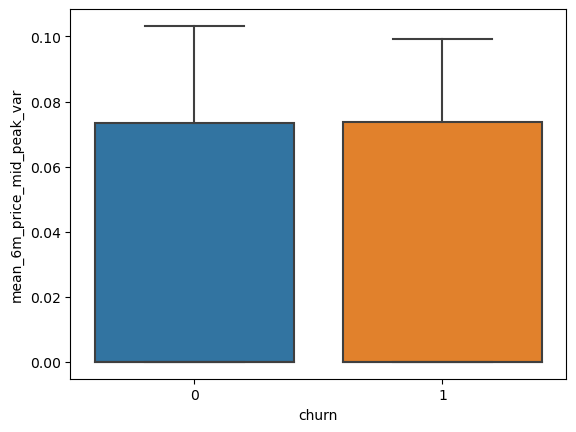

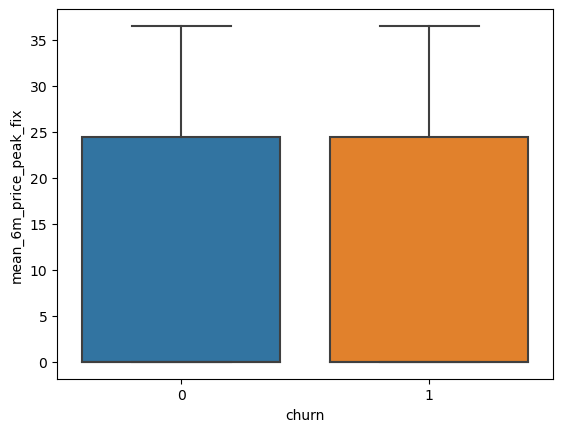

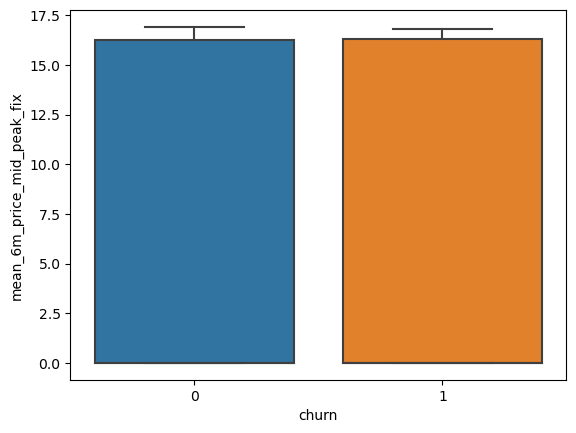

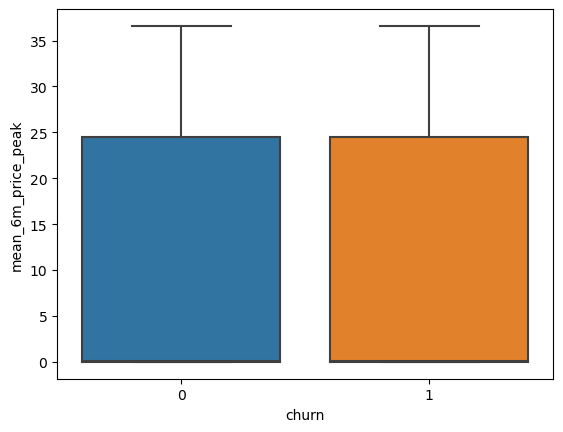

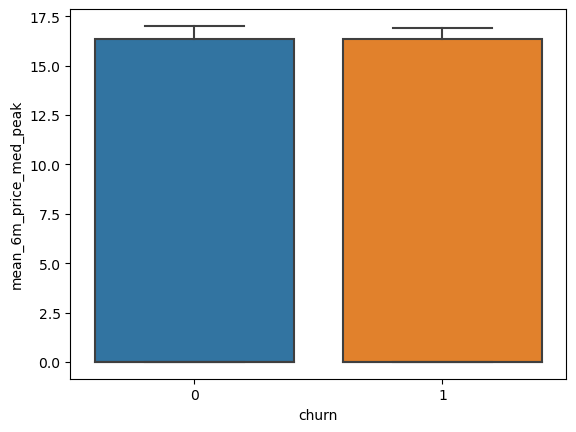

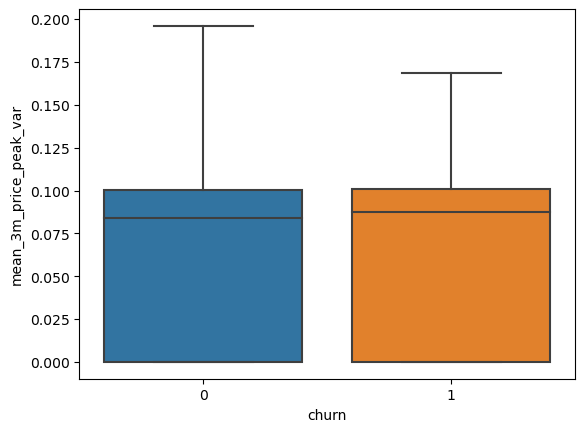

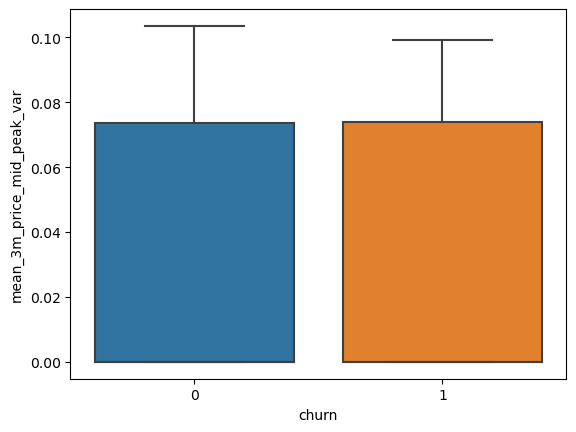

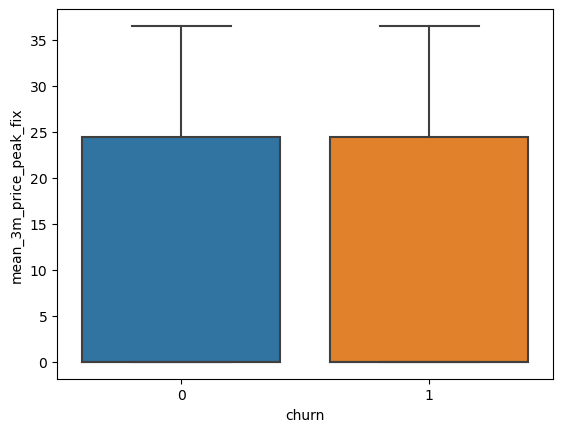

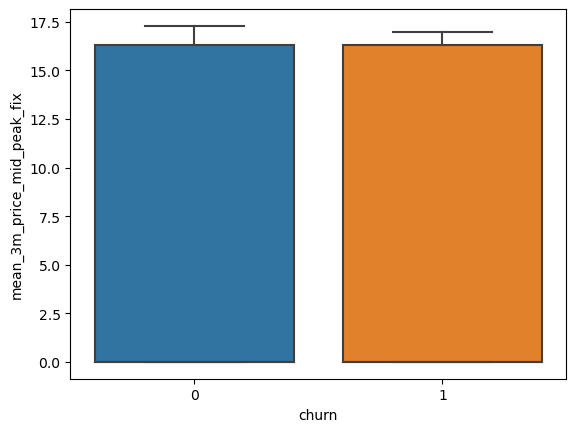

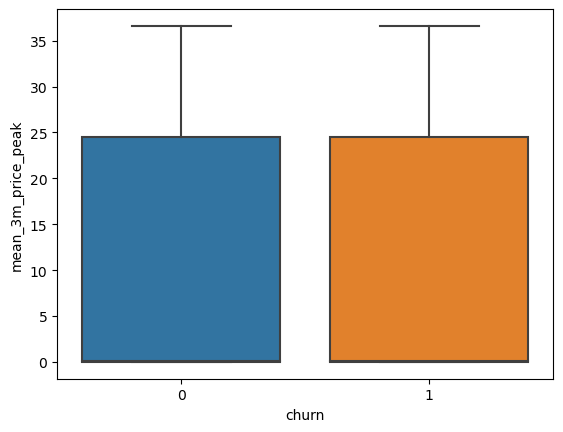

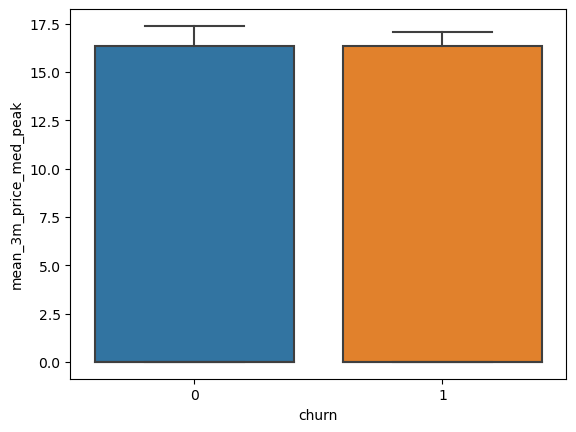

In [168]:
for i in greater:
    sns.boxplot(price_churn['churn'],price_churn[i])
    plt.show()

<Figure size 2000x1000 with 0 Axes>

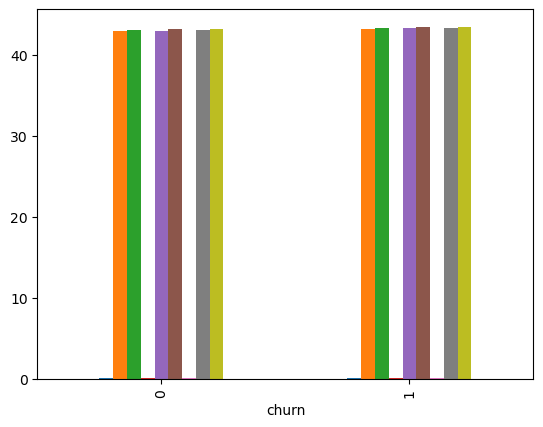

In [181]:
plt.figure(figsize=(20,10))
ax = price_churn.groupby('churn')[lesser].mean().plot(kind='bar')
plt.legend(['Value'], loc='upper right')

# Remove the legend
ax.legend_.remove()
plt.show()
# here its evident that means are same for churned customers and retained for off price

## **we can see that other than the off peak prices statistiscally all the other prices are greater for churned customers than retained customers so we can say that price can affect  the churn So our Alternative hypothesis holds good** 


In [166]:
churn_data = client_df.merge(price_churn.drop(columns='churn'),on ='id')


churn_data.to_csv('churn_data.csv')